In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Patch

In [4]:
countries

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0
...,...,...,...,...,...,...
257,Africa,AF,"Zambia, Republic of",ZM,ZMB,894.0
258,Oceania,OC,Disputed Territory,XX,NaN,NaN
259,Asia,AS,Iraq-Saudi Arabia Neutral Zone,XE,NaN,NaN
260,Asia,AS,United Nations Neutral Zone,XD,NaN,NaN


In [5]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Continent_Name             262 non-null    object 
 1   Continent_Code             219 non-null    object 
 2   Country_Name               262 non-null    object 
 3   Two_Letter_Country_Code    261 non-null    object 
 4   Three_Letter_Country_Code  258 non-null    object 
 5   Country_Number             258 non-null    float64
dtypes: float64(1), object(5)
memory usage: 12.4+ KB


In [6]:
countries = countries.rename(columns={'Two_Letter_Country_Code': 'CountryCode'}) # matching country code column names
countries['Country_Name'] = countries['Country_Name'].replace('United Kingdom of Great Britain & Northern Ireland', 'United Kingdom') #resizing a big country name for better chart visualization
countries = countries[['Continent_Name', 'Country_Name', 'CountryCode']]
countries['Country_Name'] = countries['Country_Name'].str.split(',').str[0] # removing all names after the comma
countries

,Continent_Name,Country_Name,CountryCode
0,Asia,Afghanistan,AF
1,Europe,Albania,AL
2,Antarctica,Antarctica (the territory South of 60 deg S),AQ
3,Africa,Algeria,DZ
4,Oceania,American Samoa,AS
...,...,...,...
257,Africa,Zambia,ZM
258,Oceania,Disputed Territory,XX
259,Asia,Iraq-Saudi Arabia Neutral Zone,XE
260,Asia,United Nations Neutral Zone,XD


In [7]:
counts = countries.CountryCode.value_counts() # searching for duplicate values
countries[countries.CountryCode.isin(counts[counts > 1].index)]

,Continent_Name,Country_Name,CountryCode
8,Europe,Azerbaijan,AZ
9,Asia,Azerbaijan,AZ
16,Europe,Armenia,AM
17,Asia,Armenia,AM
58,Europe,Cyprus,CY
59,Asia,Cyprus,CY
83,Europe,Georgia,GE
84,Asia,Georgia,GE
116,Europe,Kazakhstan,KZ
117,Asia,Kazakhstan,KZ


In [8]:
countries = countries.drop_duplicates() #removing duplicate values
countries

,Continent_Name,Country_Name,CountryCode
0,Asia,Afghanistan,AF
1,Europe,Albania,AL
2,Antarctica,Antarctica (the territory South of 60 deg S),AQ
3,Africa,Algeria,DZ
4,Oceania,American Samoa,AS
...,...,...,...
257,Africa,Zambia,ZM
258,Oceania,Disputed Territory,XX
259,Asia,Iraq-Saudi Arabia Neutral Zone,XE
260,Asia,United Nations Neutral Zone,XD


In [9]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PlayerId       1000 non-null   int64  
 1   NameFirst      1000 non-null   object 
 2   NameLast       1000 non-null   object 
 3   CurrentHandle  1000 non-null   object 
 4   CountryCode    1000 non-null   object 
 5   TotalUSDPrize  1000 non-null   float64
 6   Game           1000 non-null   object 
 7   Genre          1000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [10]:
players['CountryCode'] = players['CountryCode'].str.upper() # capitalizing the countries codes
players = players.merge(countries, on='CountryCode', how='left') # merging players and countries datasets by CountryCode
players['TotalUSDPrize'] = players['TotalUSDPrize'].astype('int64') # converting prize values from float to integer
players = players.sort_values('TotalUSDPrize', ascending=False).reset_index(drop=True)
players

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre,Continent_Name,Country_Name
0,3304,Johan,Sundstein,N0tail,DK,6952596,Dota 2,Multiplayer Online Battle Arena,Europe,Denmark
1,3822,Jesse,Vainikka,JerAx,FI,6470000,Dota 2,Multiplayer Online Battle Arena,Europe,Finland
2,30451,Anathan,Pham,ana,AU,6000411,Dota 2,Multiplayer Online Battle Arena,Oceania,Australia
3,2811,Sébastien,Debs,Ceb,FR,5554297,Dota 2,Multiplayer Online Battle Arena,Europe,France
4,18897,Topias,Taavitsainen,Topson,FI,5470902,Dota 2,Multiplayer Online Battle Arena,Europe,Finland
...,...,...,...,...,...,...,...,...,...,...
1027,83085,En Hao,Chen,Gua,TW,26666,Arena of Valor,Multiplayer Online Battle Arena,Asia,Taiwan
1028,83083,Yu-Yan,Su,GaDuo,TW,26666,Arena of Valor,Multiplayer Online Battle Arena,Asia,Taiwan
1029,70343,-,-,Rain,TW,26645,Arena of Valor,Multiplayer Online Battle Arena,Asia,Taiwan
1030,12241,Komklit,Wongsawat,O7T-V1,TH,25941,Arena of Valor,Multiplayer Online Battle Arena,Asia,Thailand


In [11]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TeamId            928 non-null    int64  
 1   TeamName          928 non-null    object 
 2   TotalUSDPrize     928 non-null    float64
 3   TotalTournaments  928 non-null    int64  
 4   Game              928 non-null    object 
 5   Genre             928 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 43.6+ KB


In [12]:
teams.TotalUSDPrize = teams.TotalUSDPrize.astype('int64')
teams

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000,6,Overwatch,First-Person Shooter
...,...,...,...,...,...,...
923,24781,Rex Regum Qeon,6286,2,Arena of Valor,Multiplayer Online Battle Arena
924,261,Alliance,4000,1,Arena of Valor,Multiplayer Online Battle Arena
925,713,Marines Esports,3429,1,Arena of Valor,Multiplayer Online Battle Arena
926,608,British National Team,2500,1,Arena of Valor,Multiplayer Online Battle Arena


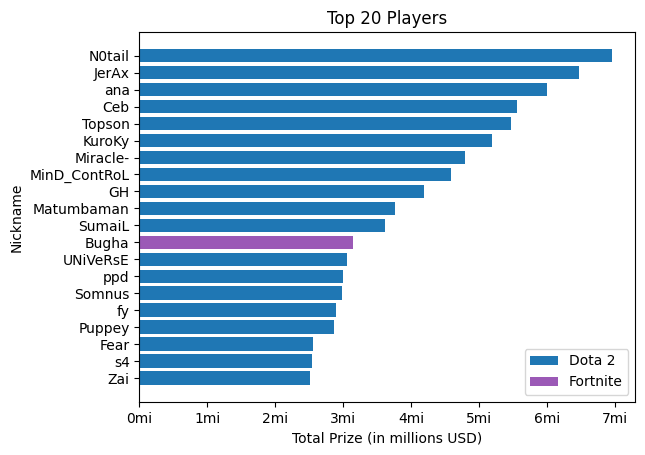

In [13]:
top_players = players[['NameFirst', 'CurrentHandle', 'TotalUSDPrize', 'Game', 'Country_Name']].head(20).sort_values('TotalUSDPrize', ascending=True)
top_players = top_players[['CurrentHandle', 'TotalUSDPrize', 'Game']]
top_players['CurrentHandle'] = top_players['CurrentHandle'].replace('Somnus丶M', 'Somnus')
game_colors = {
    'Dota 2': (31/255,119/255,180/255),
    'Fortnite': (155/255, 89/255, 182/255)
}
bars = plt.barh(top_players['CurrentHandle'], top_players['TotalUSDPrize'], color=[game_colors[game] for game in top_players['Game']])
plt.xlabel('Total Prize (in millions USD)')
plt.ylabel('Nickname')
plt.title('Top 20 Players')
legend_handles = [Patch(facecolor=color) for color in game_colors.values()]
legend_labels = list(game_colors.keys())
plt.legend(legend_handles, legend_labels)
formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x/1000000)}mi')
plt.gca().xaxis.set_major_formatter(formatter)

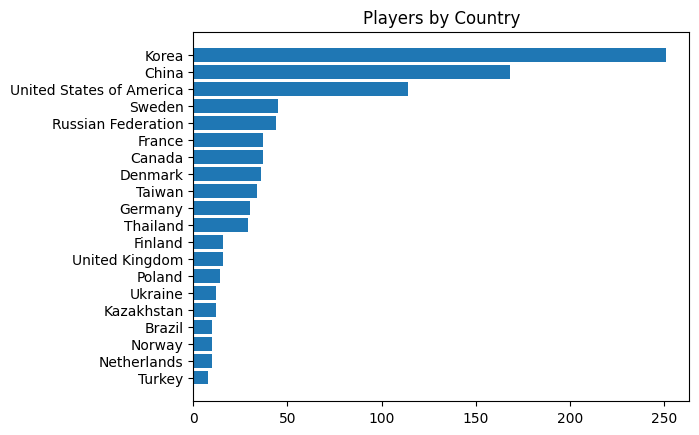

count     20.000000
mean      46.650000
std       61.962871
min        8.000000
25%       12.000000
50%       29.500000
75%       38.750000
max      251.000000
Name: Country_Name, dtype: float64

In [14]:
ranking = players['Country_Name'].value_counts().head(20).sort_values(ascending=True)
plt.barh(ranking.index, ranking.values)
plt.title('Players by Country')
plt.show()
ranking.describe()

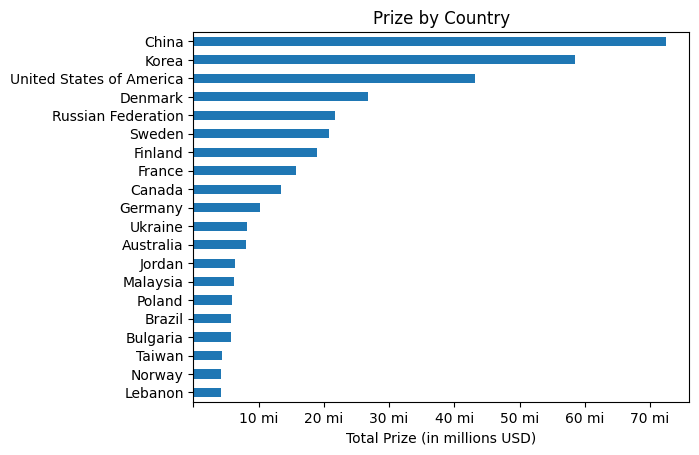

In [15]:
earnings_per_country = players.groupby('Country_Name')['TotalUSDPrize'].sum()
earnings_per_country = earnings_per_country.sort_values(ascending=True).tail(20)
fig, ax = plt.subplots()
earnings_per_country.plot(kind='barh', ax=ax)
def format_func(x, pos):
    if x == 0:
        return None
    else:
        return f'{int(x/1e6):,} mi'
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))
ax.set_xlabel('Total Prize (in millions USD)')
ax.set_ylabel('')
ax.set_title('Prize by Country')
plt.show()

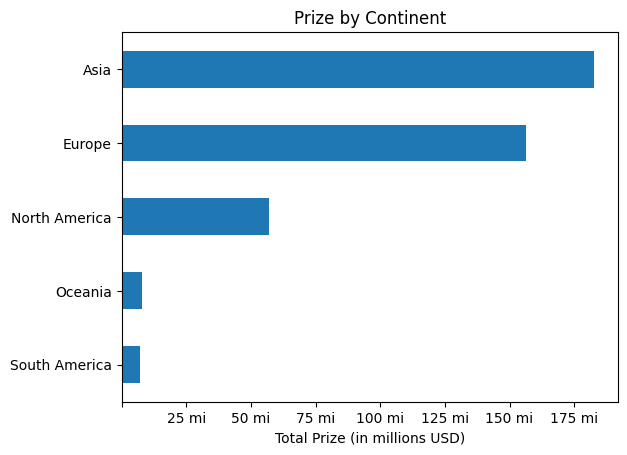

In [16]:
earnings_per_cont = players.groupby('Continent_Name')['TotalUSDPrize'].sum()
earnings_per_cont = earnings_per_cont.sort_values(ascending=True).tail(20)
fig, ax = plt.subplots()
earnings_per_cont.plot(kind='barh', ax=ax)
def format_func(x, pos):
    if x == 0:
        return None
    else:
        return f'{int(x/1e6):,} mi'
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))
ax.set_xlabel('Total Prize (in millions USD)')
ax.set_ylabel('')
ax.set_title('Prize by Continent')
plt.show()

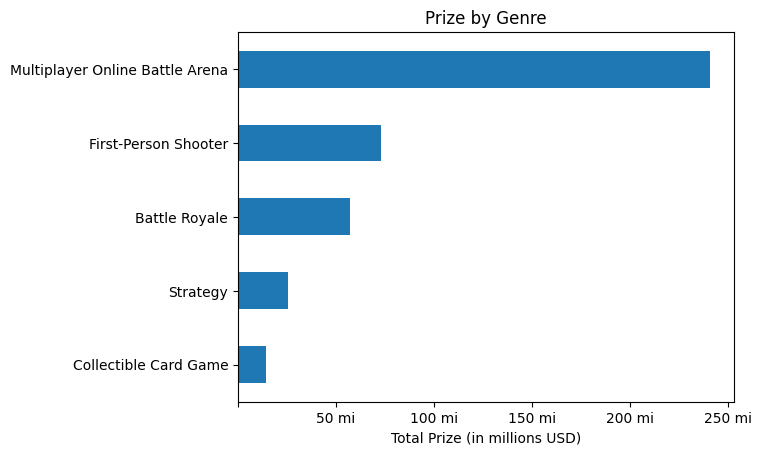

In [17]:
genre = players.groupby(['Genre'])['TotalUSDPrize'].sum().sort_values(ascending=True)
fig, ax = plt.subplots()
genre.plot(x='Genre', y='TotalUSDPrize', kind='barh', ax=ax)
def format_func(x, pos):
    if x == 0:
        return None
    else:
        return f'{int(x/1e6):,} mi'
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))
ax.set_xlabel('Total Prize (in millions USD)')
ax.set_ylabel('')
ax.set_title('Prize by Genre')
plt.show()

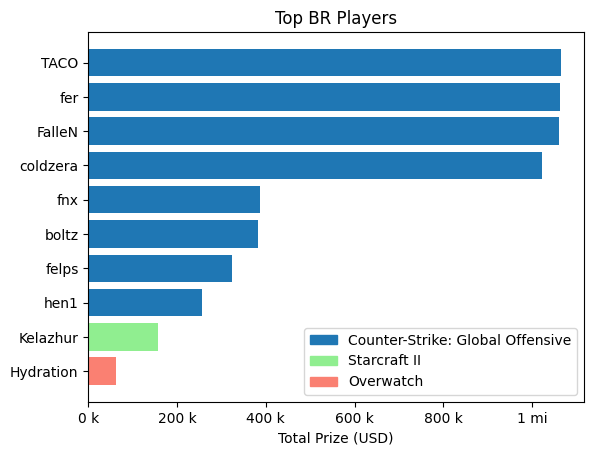

In [18]:
filter_br = players.Country_Name == "Brazil"
br = players[filter_br].reset_index(drop=True)
top_br = br[['CurrentHandle', 'TotalUSDPrize', 'Game']]
top_br = top_br.sort_values('TotalUSDPrize', ascending=True)
colors = {'Counter-Strike: Global Offensive': (31/255,119/255,180/255), 'Starcraft II': 'lightgreen', 'Overwatch': 'salmon'}
top_br['Color'] = top_br['Game'].map(colors)

fig, ax = plt.subplots()
for i, row in top_br.iterrows():
    ax.barh(row['CurrentHandle'], row['TotalUSDPrize'], color=row['Color'])
def format_func(x, pos):
    if x < 1e6:
        return f'{int(x/1e3):,} k'
    else:
        return f'{int(x/1e6):,} mi'
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))
ax.set_xlabel('Total Prize (USD)')
ax.set_ylabel('Player')
ax.set_title('Top BR Players')
ax.yaxis.set_label_text('')
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors.values()]
labels = colors.keys()
ax.legend(handles, labels, title='', loc='lower right')
plt.show()

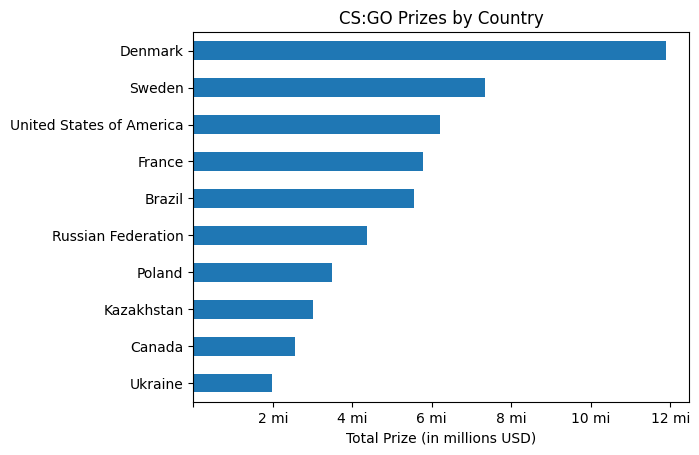

In [19]:
filter_cs = players.Game == 'Counter-Strike: Global Offensive'
cs = players[filter_cs]
cs_country = cs.groupby('Country_Name')['TotalUSDPrize'].sum()
cs_country = cs_country.sort_values(ascending=True).tail(10)
fig, ax = plt.subplots()
cs_country.plot(kind='barh', ax=ax)
def format_func(x, pos):
    if x == 0:
        return None
    else:
        return f'{int(x/1e6):,} mi'
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))
ax.set_xlabel('Total Prize (in millions USD)')
ax.set_ylabel('')
ax.set_title('CS:GO Prizes by Country')
plt.show()

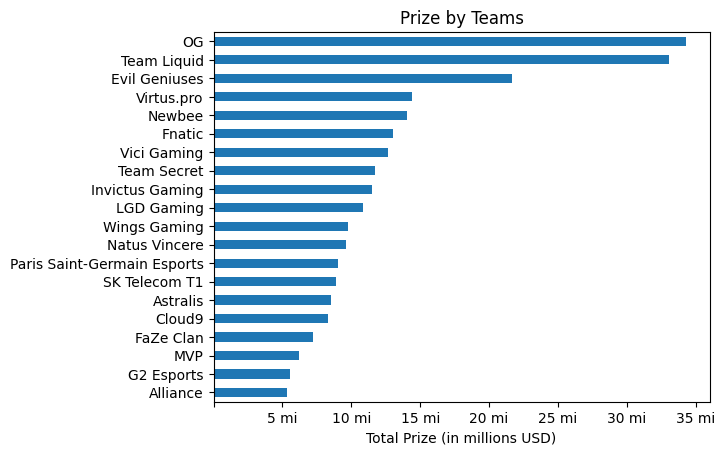

In [20]:
prize_team = teams.groupby(['TeamName'])['TotalUSDPrize'].sum().sort_values(ascending=True).tail(20)
fig, ax = plt.subplots()
prize_team.plot(x='TeamName', y='TotalUSDPrize', kind='barh', ax=ax)
def format_func(x, pos):
    if x == 0:
        return None
    else:
        return f'{int(x/1e6):,} mi'
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))
ax.set_xlabel('Total Prize (in millions USD)')
ax.set_ylabel('')
ax.set_title('Prize by Teams')
plt.show()

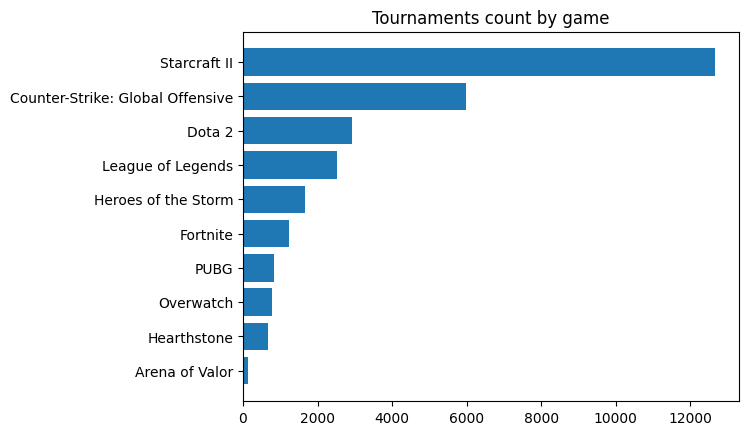

In [21]:
tournaments_count = teams.groupby('Game')['TotalTournaments'].sum().sort_values(ascending=True)
plt.barh(tournaments_count.index, tournaments_count.values)
plt.title('Tournaments count by game')
plt.show()

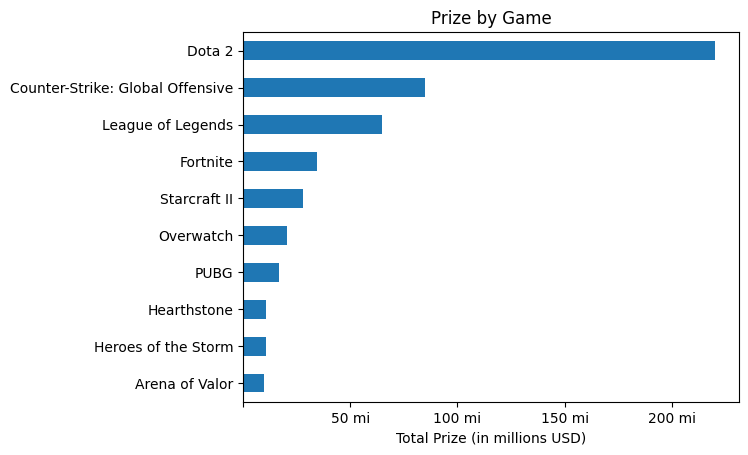

In [22]:
games_earnings = teams.groupby(['Game'])['TotalUSDPrize'].sum().sort_values(ascending=True)
fig, ax = plt.subplots()
games_earnings.plot(x='Game', y='TotalUSDPrize', kind='barh', ax=ax)
def format_func(x, pos):
    if x == 0:
        return None
    else:
        return f'{int(x/1e6):,} mi'
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))
ax.set_xlabel('Total Prize (in millions USD)')
ax.set_ylabel('')
ax.set_title('Prize by Game')
plt.show()

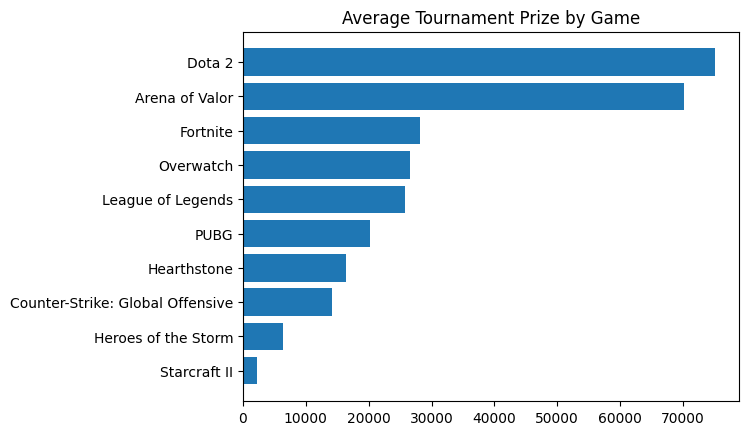

In [23]:
games_earnings_index = teams.groupby(['Game'])['TotalUSDPrize'].sum().sort_index()
tournaments_count_index = teams.groupby('Game')['TotalTournaments'].sum().sort_index()
avrg = (games_earnings_index / tournaments_count_index).astype('int64')
avrg = avrg.sort_values(ascending=True)
plt.barh(avrg.index, avrg.values)
plt.title('Average Tournament Prize by Game')
plt.show()